## Neural network for identifying lung diseases from a chest x-ray dataset

In [2]:
# Libraries importieren
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import kagglehub

/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Download latest version of dataset from Kaggle
path = kagglehub.dataset_download("muhammadrehan00/chest-xray-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/felixzauner/.cache/kagglehub/datasets/muhammadrehan00/chest-xray-dataset/versions/1


In [4]:
# Print the paths to the train and test directories
train_dir = os.path.join(path, "chest_xray", "train")
test_dir = os.path.join(path, "chest_xray", "test")
print("Train directory:", train_dir)
print("Test directory:", test_dir)

Train directory: /Users/felixzauner/.cache/kagglehub/datasets/muhammadrehan00/chest-xray-dataset/versions/1/chest_xray/train
Test directory: /Users/felixzauner/.cache/kagglehub/datasets/muhammadrehan00/chest-xray-dataset/versions/1/chest_xray/test


Random image path: /Users/felixzauner/.cache/kagglehub/datasets/muhammadrehan00/chest-xray-dataset/versions/1/train/normal/normal-2121.jpg
Image class:    normal
Image height:   1229
Image width:    1554


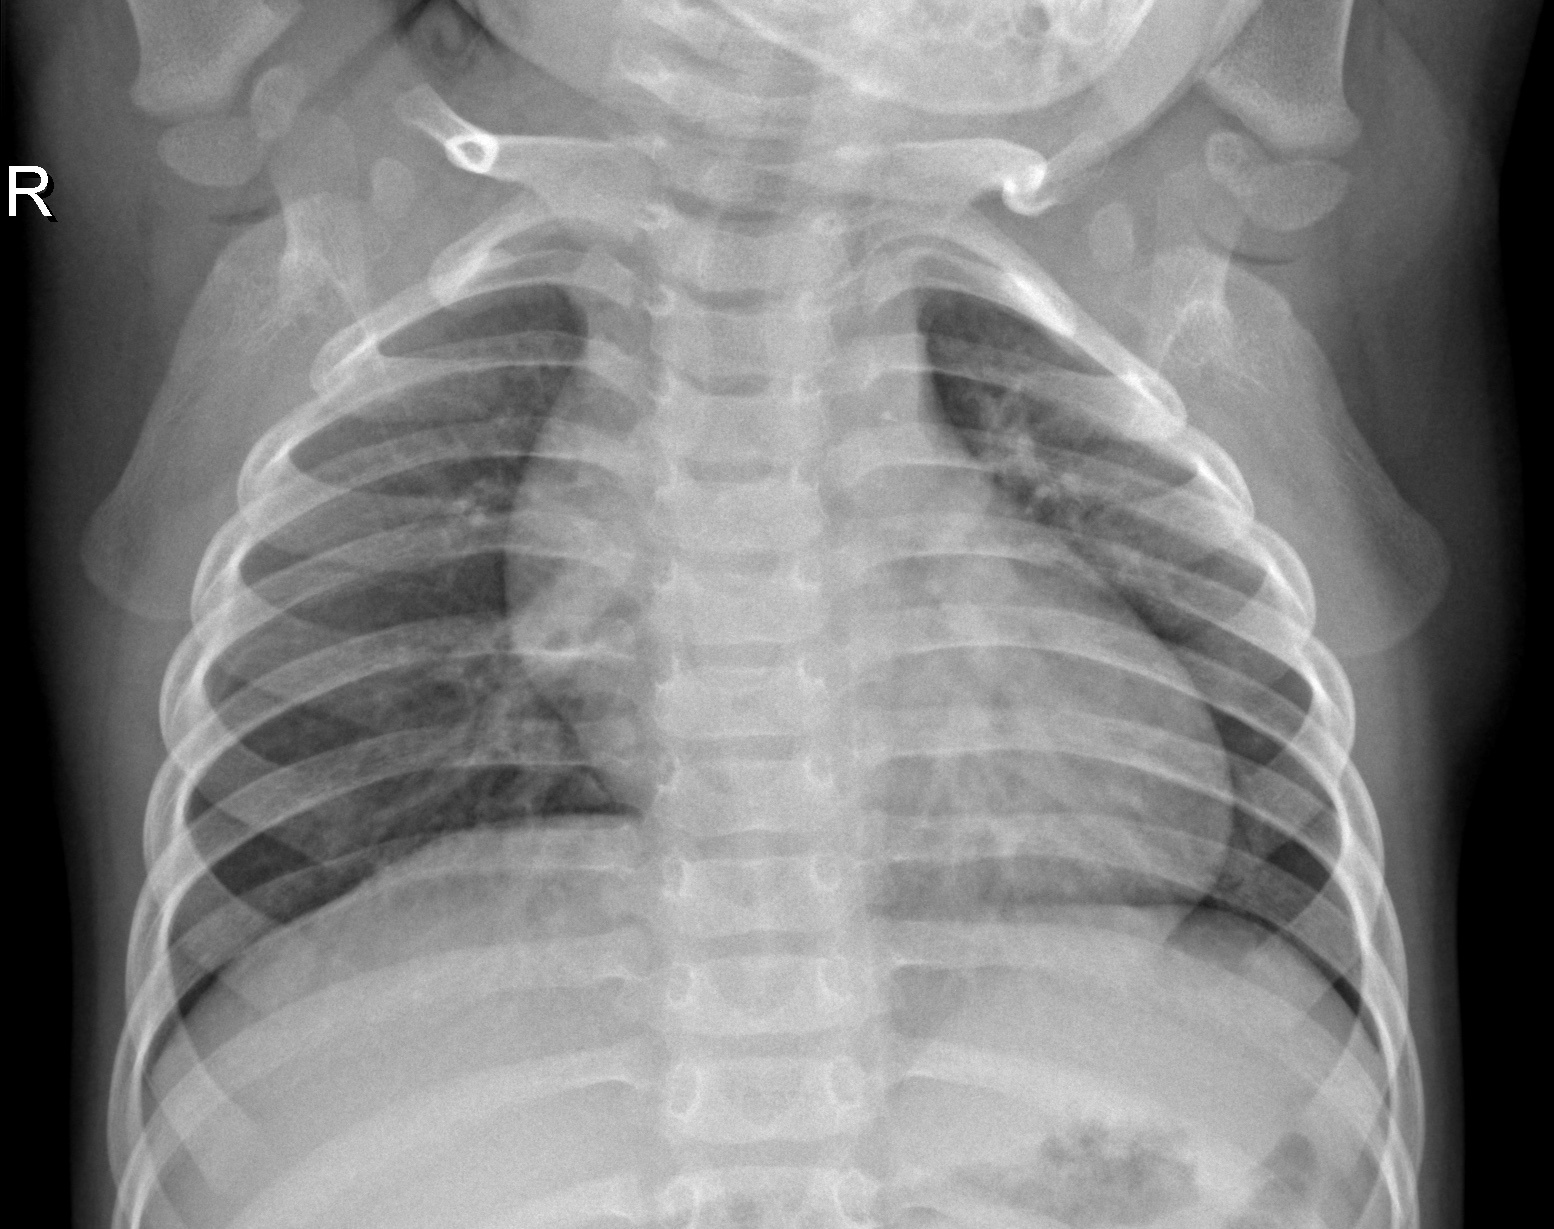

In [5]:
# View a random image from the dataset
import random
from pathlib import Path
from PIL import Image

# set seed for randomness
random.seed(911)

# Convert your original data_dir string to a path_object
base_dir = Path(path) / "train"

# 1. Get all image paths 
image_path_list = list(base_dir.glob("*/*.jpg"))

# 2. Pick a random image
random_image_path = random.choice(image_path_list)

# 3. Get image class from directory name
image_class = os.path.basename(os.path.dirname(random_image_path))

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class:    {image_class}")
print(f"Image height:   {img.height}") 
print(f"Image width:    {img.width}")


# Display the image
img


In [6]:
# Transform and load images
import cv2
def load_images(folder, label, img_size=(128, 128)):
    X, y = [], []

    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size)
        X.append(img)
        y.append(label)

    return X, y


In [28]:
X_train, y_train = [], []

# Train
normal_X, normal_y = load_images(os.path.join(path, "train/NORMAL"), "Normal")
pneu_X, pneu_y     = load_images(os.path.join(path, "train/PNEUMONIA"), "Pneumonia")
tub_X, tub_y       = load_images(os.path.join(path, "train/TUBERCULOSIS"), "Tuberculosis")

X_train.extend(normal_X + pneu_X + tub_X)
y_train.extend(normal_y + pneu_y + tub_y)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [29]:
X_test, y_test = [], []

# Test
normal_X, normal_y = load_images(os.path.join(path, "test/NORMAL"), "Normal")
pneu_X, pneu_y     = load_images(os.path.join(path, "test/PNEUMONIA"), "Pneumonia")
tub_X, tub_y       = load_images(os.path.join(path, "test/TUBERCULOSIS"), "Tuberculosis")

X_test.extend(normal_X + pneu_X + tub_X)
y_test.extend(normal_y + pneu_y + tub_y)

X_test = np.array(X_test)
y_test = np.array(y_test)

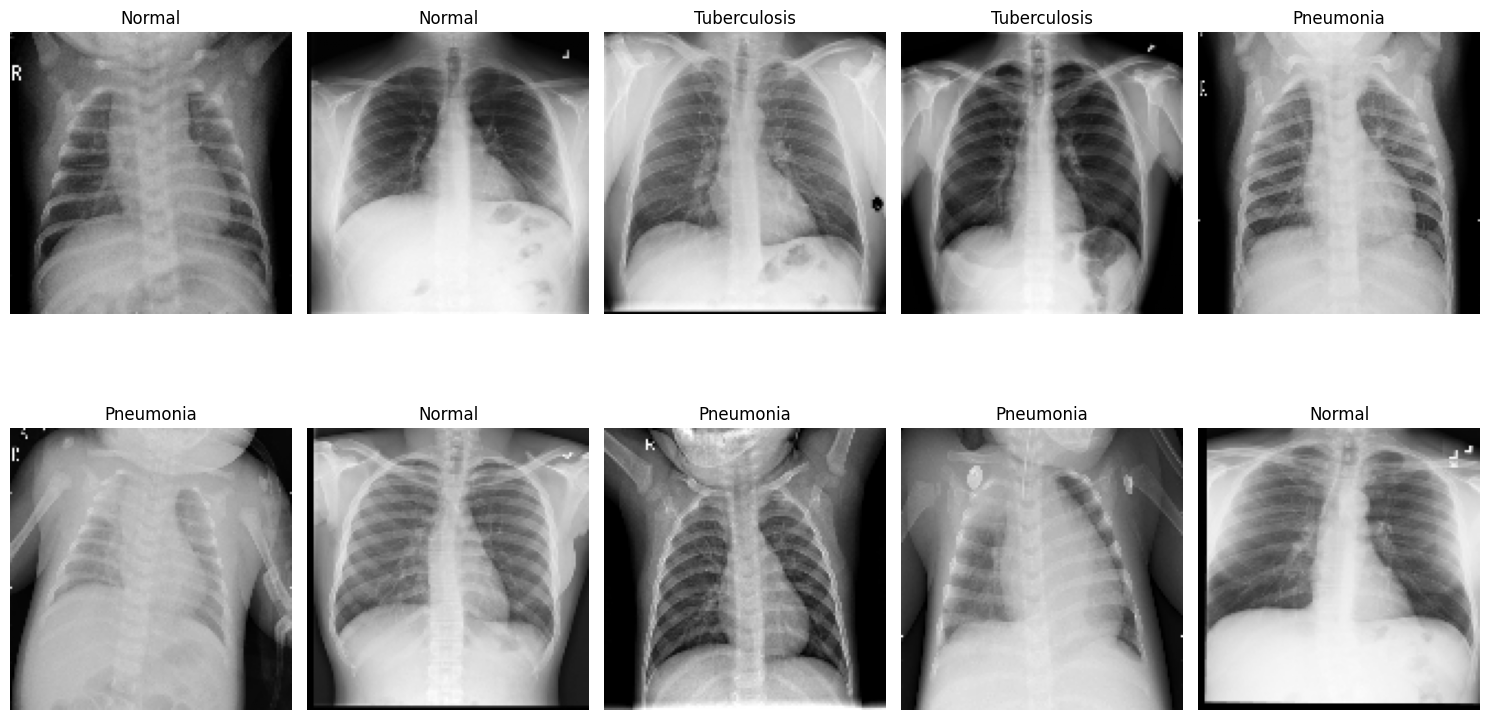

In [41]:
# Zufällige 3x5 Bilder anzeigen
rows, cols = 2, 5
num = rows * cols
indices = random.sample(range(len(X_train)), num)
fig, axes = plt.subplots(rows, cols, figsize=(15, 9))
axes = axes.flatten()

for ax, idx in zip(axes, indices):
    ax.imshow(X_train[idx], cmap='gray')
    ax.set_title(label_names.get(y_train[idx], y_train[idx]))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(X_test[0])

[[138 109  83 ... 105 157 220]
 [  7   1   1 ...   1  27 147]
 [  0   0   0 ...   0   1  54]
 ...
 [ 46   7   1 ...  79  99 140]
 [ 60  18   3 ... 100 122 158]
 [ 75  30  17 ... 125 148 183]]


In [31]:
X_test = X_test / 255.0
X_train = X_train / 255.0

## Erster Versuch mit MLP Classifier

In [ ]:
# Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(128,128,64), max_iter=300, alpha=1e-4,
                    solver='adam', verbose=True, random_state=912)

# Flatten images to (n_samples, n_features) because MLPClassifier expects 2D input
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Fit model
mlp.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 1, loss = 0.66080399
Iteration 2, loss = 0.50526444
Iteration 3, loss = 0.48367334
Iteration 4, loss = 0.46619045


/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50), max_iter=100,
              random_state=912, verbose=True)

In [45]:
# Vorhersagen auf dem Testset machen
y_pred = mlp.predict(X_test_scaled)

# Ergebnisse auswerten
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[680 139 106]
 [ 66 507   7]
 [366   3 695]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.61      0.74      0.67       925
   Pneumonia       0.78      0.87      0.83       580
Tuberculosis       0.86      0.65      0.74      1064

    accuracy                           0.73      2569
   macro avg       0.75      0.75      0.75      2569
weighted avg       0.75      0.73      0.73      2569



/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


## Zweiter Verusch mit MLP Classifier mit mehr Layer & Iterationen

In [12]:
# Optimized MLP with early stopping, higher max_iter and tuned learning rate/batch size
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=True, random_state=912)

# Fit model
mlp2.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 1, loss = 0.95251429
Iteration 2, loss = 0.67682991
Iteration 3, loss = 0.63833505
Iteration 4, loss = 0.58375524
Iteration 5, loss = 0.54557694
Iteration 6, loss = 0.52901364
Iteration 7, loss = 0.48986050
Iteration 8, loss = 0.49837130
Iteration 9, loss = 0.48096263
Iteration 10, loss = 0.47561267
Iteration 11, loss = 0.46272965
Iteration 12, loss = 0.45180399
Iteration 13, loss = 0.45613376
Iteration 14, loss = 0.45883039
Iteration 15, loss = 0.45227903
Iteration 16, loss = 0.44587215
Iteration 17, loss = 0.45052870
Iteration 18, loss = 0.43386862
Iteration 19, loss = 0.43587955
Iteration 20, loss = 0.43186085
Iteration 21, loss = 0.42976839
Iteration 22, loss = 0.42847129
Iteration 23, loss = 0.43107354
Iteration 24, loss = 0.42556491
Iteration 25, loss = 0.42699921
Iteration 26, loss = 0.42509444
Iteration 27, loss = 0.41837095
Iteration 28, loss = 0.41849690
Iteration 29, loss = 0.41937799
Iteration 30, loss = 0.41550321
Iteration 31, loss = 0.40588273
Iteration 32, los

/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=100, random_state=912,
              verbose=True)

In [13]:
# Vorhersagen auf dem Testset machen
y_pred2 = mlp2.predict(X_test_scaled)

# Ergebnisse auswerten
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

Confusion Matrix:
[[666 141 118]
 [137 432  11]
 [389   2 673]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.56      0.72      0.63       925
   Pneumonia       0.75      0.74      0.75       580
Tuberculosis       0.84      0.63      0.72      1064

    accuracy                           0.69      2569
   macro avg       0.72      0.70      0.70      2569
weighted avg       0.72      0.69      0.69      2569



/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


## SVC ohne Feature Extraction

In [14]:
from sklearn.svm import SVC

svc = SVC(
    kernel="rbf",
    C=10,
    gamma="scale",
    class_weight="balanced"
)

svc.fit(X_train_scaled, y_train)


SVC(C=10, class_weight='balanced')

In [15]:
# Vorhersagen auf dem Testset machen
y_pred3 = svc.predict(X_test_scaled)

# Ergebnisse auswerten
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))

Confusion Matrix:
[[582 164 179]
 [109 466   5]
 [405   1 658]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.53      0.63      0.58       925
   Pneumonia       0.74      0.80      0.77       580
Tuberculosis       0.78      0.62      0.69      1064

    accuracy                           0.66      2569
   macro avg       0.68      0.68      0.68      2569
weighted avg       0.68      0.66      0.67      2569



## SVC mit Feature Extraction

In [17]:
from skimage.feature import hog

def extract_hog(images):
    features = []
    for img in images:
        hog_feat = hog(
            img,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm='L2-Hys'
        )
        features.append(hog_feat)
    return np.array(features)


In [19]:
# Extract HOG features from the original 2D images (use X_train, not the flattened/scaled array)
X_features_train = extract_hog(X_train)

In [20]:
X_features_test = extract_hog(X_test)

In [21]:
svc2 = SVC(
    kernel="rbf",
    C=10,
    gamma="scale",
    class_weight="balanced"
)

svc2.fit(X_features_train, y_train)

SVC(C=10, class_weight='balanced')

In [22]:
# Vorhersagen auf dem Testset machen
y_pred4 = svc2.predict(X_features_test)

# Ergebnisse auswerten
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred4))

Confusion Matrix:
[[372 164 389]
 [111 469   0]
 [404   1 659]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.42      0.40      0.41       925
   Pneumonia       0.74      0.81      0.77       580
Tuberculosis       0.63      0.62      0.62      1064

    accuracy                           0.58      2569
   macro avg       0.60      0.61      0.60      2569
weighted avg       0.58      0.58      0.58      2569

